In [4]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [6]:
#2차원 배열로 만들기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [8]:
#예측 -> knr과 같은 값에 대하여 테스트 했는데 결과 다름.
print(lr.predict([[50]]))
print(lr.predict([[100]]))

[1241.83860323]
[3192.69585141]


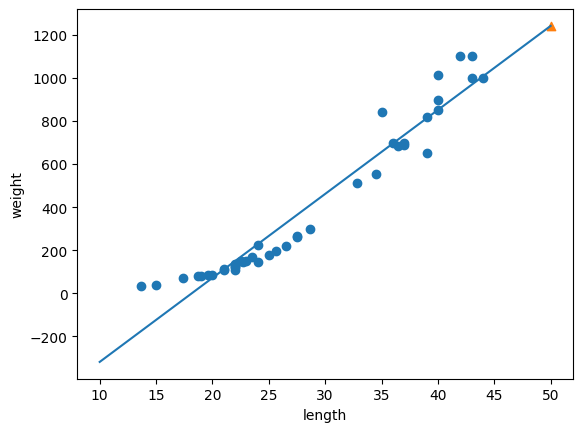

In [10]:
import matplotlib.pyplot as plt
A = lr.coef_ #계수
B = lr.intercept_ # 절편, 독립항

plt.scatter(train_input, train_target)
plt.plot([10,50], [10*A+B, 50*A+B])
plt.scatter(50, 1241.83860323, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [11]:
lr.predict([[50]]) == A * 50 + B

array([ True])

In [12]:
lr.predict([[15]])  #-123.7614705

array([-123.7614705])

In [13]:
# 밑에 있는 값 들을 예측하려면 직선이 아니라 다항식으로 가야된다.

In [14]:
from sklearn.linear_model import LinearRegression
## 다항회귀 모델의 그래프 그려보기
train_poly = np.column_stack( (train_input **2, train_input) )
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50 **2 , 50]])


array([1573.98423528])

In [15]:
p = lr.predict([[50 **2 , 50]])
float(p[0])

1573.9842352827404

In [16]:
# 다항식 : weight = (A * (length)^2) + (B*length) + (C))
print(lr.coef_, lr.intercept_)
A = lr.coef_[0]
B = lr.coef_[1]
C = lr.intercept_

[  1.01433211 -21.55792498] 116.05021078278264


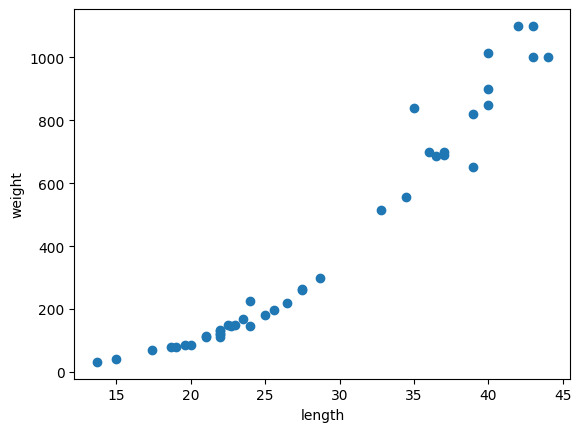

In [17]:
import matplotlib.pyplot as plt
# 다항식 차트로 그려보기
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

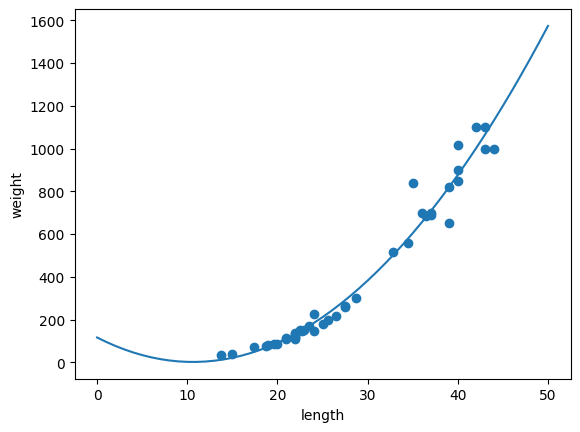

In [18]:
# 다항식 차트로 그려보기
points = np.arange(0,51)
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.plot(points, (A * points**2) + (B * points) + C)
plt.show()

In [19]:
import pickle
with open("linear_model.pkl", "wb") as f:
    pickle.dump(lr,f)


In [20]:
np.version

<module 'numpy.version' from '/home/sujin/code/fr/.venv/lib/python3.11/site-packages/numpy/version.py'>